In [12]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/intel dataset/Dataset.zip'
extract_path = '/content/intel_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete.")


Extraction complete.


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,MaxPooling2D,Dense,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report

In [15]:
train_dir = '/content/intel_data/seg_train/seg_train'
test_dir = '/content/intel_data/seg_test/seg_test'
pred_dir = '/content/intel_data/seg_pred'


In [16]:
import os

def print_directory_structure(start_path, indent=''):
    for item in os.listdir(start_path):
        item_path = os.path.join(start_path, item)
        if os.path.isdir(item_path):
            print(f"{indent}📁 {item}/")
            print_directory_structure(item_path, indent + '    ')
        else:
            print(f"{indent}📄 {item}")

print("📦 Extracted Directory Structure:\n")
print_directory_structure('/content/intel_data')


📦 Extracted Directory Structure:

📁 seg_pred/
    📁 seg_pred/
        📄 18085.jpg
        📄 16464.jpg
        📄 24257.jpg
        📄 23066.jpg
        📄 12297.jpg
        📄 8992.jpg
        📄 17159.jpg
        📄 5888.jpg
        📄 17880.jpg
        📄 15077.jpg
        📄 5107.jpg
        📄 19172.jpg
        📄 10669.jpg
        📄 6371.jpg
        📄 1779.jpg
        📄 21295.jpg
        📄 14113.jpg
        📄 11061.jpg
        📄 13230.jpg
        📄 4078.jpg
        📄 8176.jpg
        📄 22067.jpg
        📄 8249.jpg
        📄 4278.jpg
        📄 4229.jpg
        📄 5813.jpg
        📄 21700.jpg
        📄 10038.jpg
        📄 6077.jpg
        📄 12363.jpg
        📄 19079.jpg
        📄 854.jpg
        📄 19877.jpg
        📄 17300.jpg
        📄 8004.jpg
        📄 18949.jpg
        📄 17052.jpg
        📄 12321.jpg
        📄 11258.jpg
        📄 14895.jpg
        📄 12545.jpg
        📄 19473.jpg
        📄 14858.jpg
        📄 20340.jpg
        📄 3987.jpg
        📄 11540.jpg
        📄 12997.jpg
        📄 2593

In [17]:
trainpath = train_dir
testpath = test_dir
predpath = pred_dir

In [18]:
IMAGE_SIZE = (228, 228)

BATCH_SIZE = 32

In [19]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  trainpath,
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 14034 files belonging to 6 classes.


In [20]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  testpath,
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 3000 files belonging to 6 classes.


In [21]:
classes_names=train_ds.class_names
print(classes_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [22]:
def getImagePaths(path):
    image_names=[]
    for dirname, _,filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names
images_paths = getImagePaths(predpath)
len(images_paths)

7301

In [23]:
images_paths = getImagePaths(trainpath)
len(images_paths)

14034

#Data Visualization

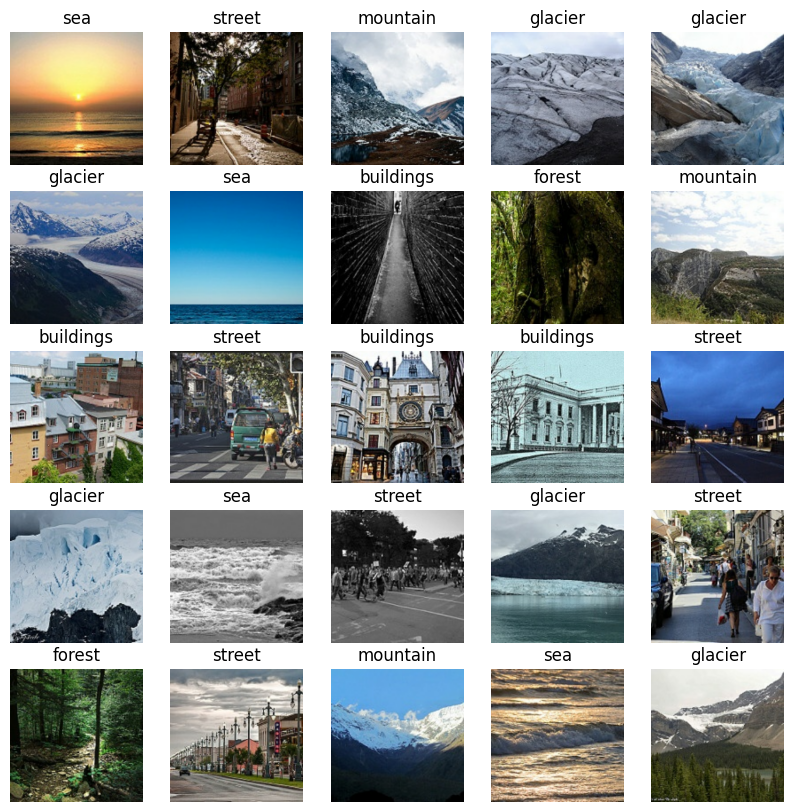

In [24]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes_names[labels[i]])
        plt.axis('off')

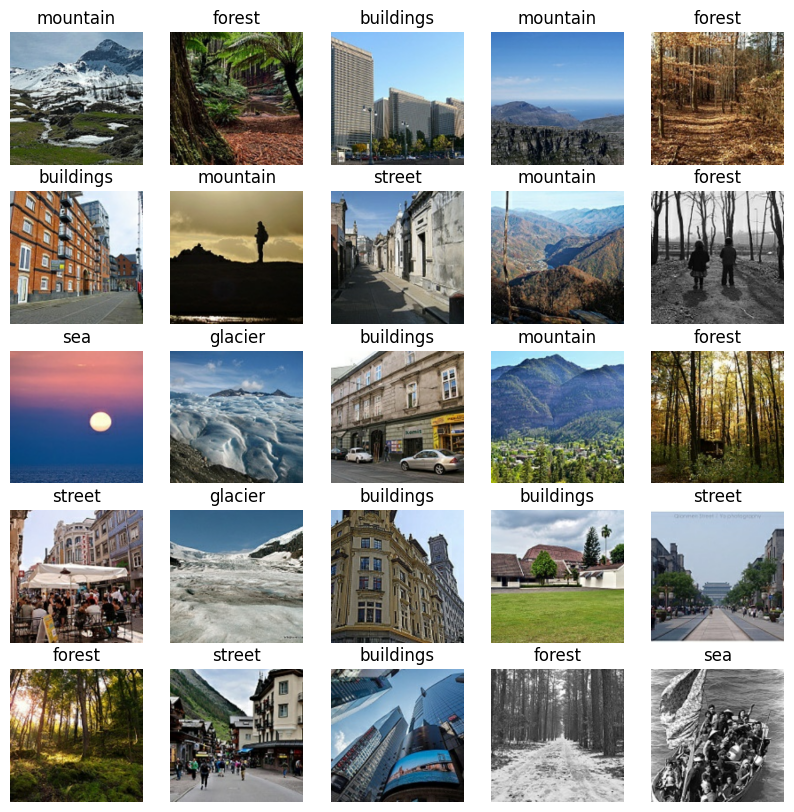

In [25]:
plt.figure(figsize=(10,10))
for image,labels in test_ds.take(1):
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(classes_names[labels[i]])
        plt.axis('off')

In [26]:
class_counts = {}
for class_name in os.listdir(trainpath):
    class_dir = os.path.join(trainpath, class_name)
    if os.path.isdir(class_dir):
        num_images = len(os.listdir(class_dir))
        class_counts[class_name] = num_images
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

glacier: 2404 images
sea: 2274 images
street: 2382 images
forest: 2271 images
buildings: 2191 images
mountain: 2512 images


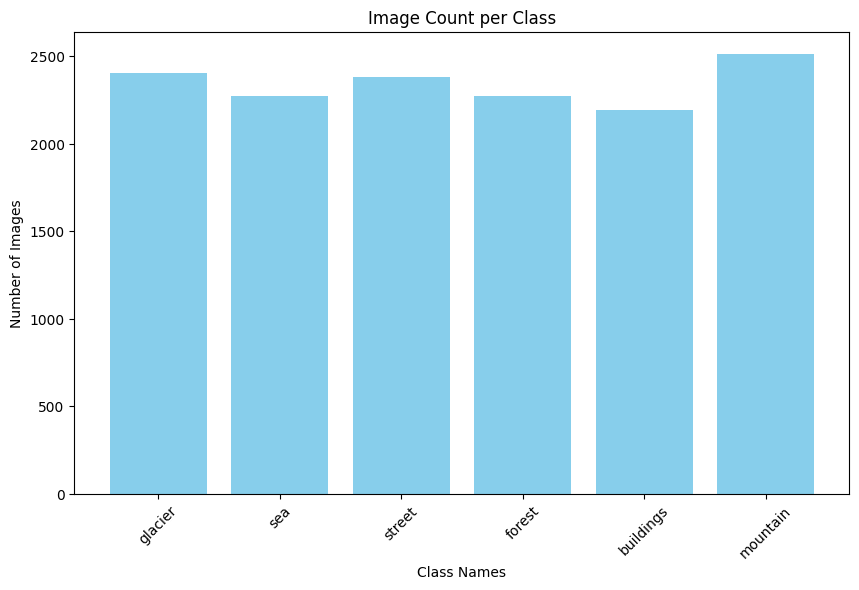

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Image Count per Class')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

In [28]:
class_counts = {}
for class_name in os.listdir(testpath):
    class_dir = os.path.join(testpath, class_name)
    if os.path.isdir(class_dir):
        num_images = len(os.listdir(class_dir))
        class_counts[class_name] = num_images
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

glacier: 553 images
sea: 510 images
street: 501 images
forest: 474 images
buildings: 437 images
mountain: 525 images


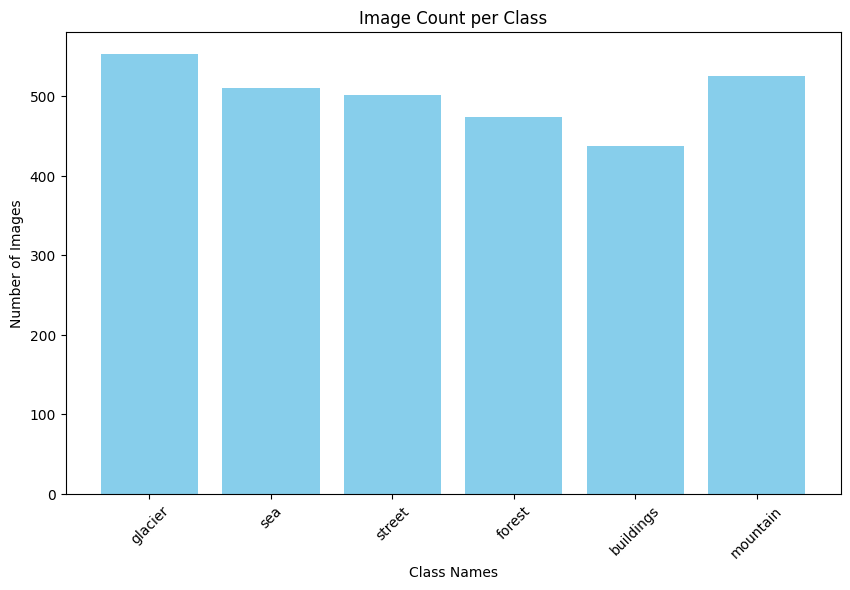

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Image Count per Class')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

In [30]:
Norm_layer=tf.keras.layers.Rescaling(1/255)
train_ds=train_ds.map(lambda x , y :(Norm_layer(x),y))
test_ds=test_ds.map(lambda x , y :(Norm_layer(x),y))

In [31]:
model=Sequential()
model.add(Input(shape=(228, 228, 3)))
model.add(Conv2D(32,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(124,activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(units=len(classes_names),activation='softmax'))

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 108, 108, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,639,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 124)            │       127,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 124)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,860,010 (7.10 MB)

 Trainable params: 1,860,010 (7.10 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
early_stopping=EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)

In [35]:
history=model.fit(train_ds,validation_data=test_ds,epochs=50,callbacks=[early_stopping])

Epoch 1/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 39s 66ms/step - accuracy: 0.4564 - loss: 1.3057 - val_accuracy: 0.5693 - val_loss: 1.0499
Epoch 2/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.6588 - loss: 0.8732 - val_accuracy: 0.6930 - val_loss: 0.8077
Epoch 3/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7301 - loss: 0.7196 - val_accuracy: 0.7580 - val_loss: 0.6813
Epoch 4/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.7700 - loss: 0.6189 - val_accuracy: 0.7920 - val_loss: 0.5913
Epoch 5/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.8073 - loss: 0.5302 - val_accuracy: 0.7817 - val_loss: 0.6292
Epoch 6/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.8350 - loss: 0.4633 - val_accuracy: 0.7707 - val_loss: 0.6177
Epoch 7/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.8490 - loss: 0.4151 - val_accuracy: 0.8090 - val_loss: 0.5724
Epoch 8/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.8726 - loss: 0.3554 - 

#Evaluate Model

In [36]:
loss, accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {accuracy * 100:.2f}%')

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8087 - loss: 0.5964
Test accuracy: 81.30%


In [37]:
loss, accuracy = model.evaluate(train_ds)
print(f'Train accuracy: {accuracy * 100:.2f}%')

439/439 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9001 - loss: 0.2830
Train accuracy: 90.67%


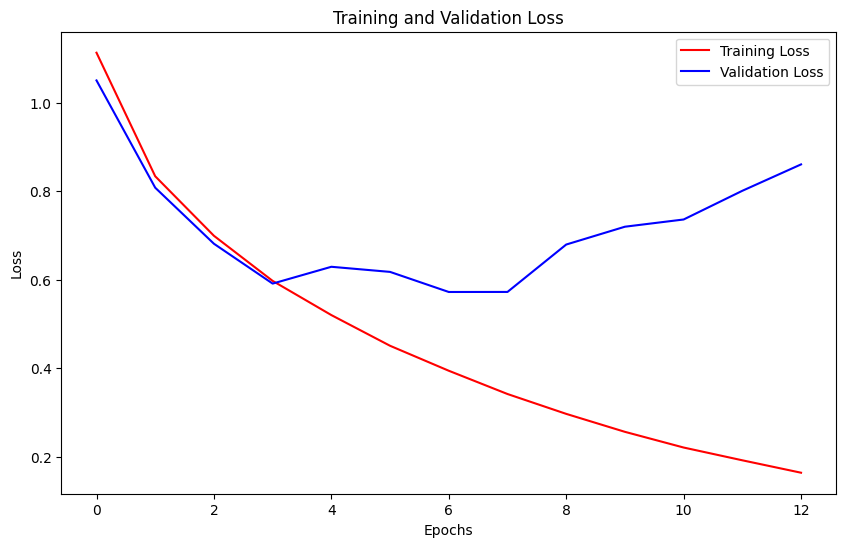

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, c="red", label="Training Loss")
plt.plot(epochs, val_loss, c="blue", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

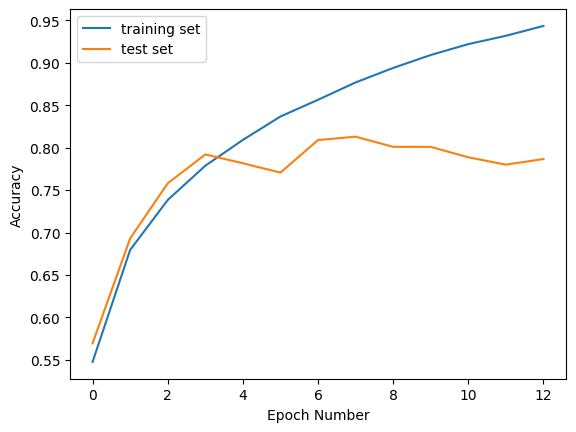

In [39]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

#Make Prediction

In [50]:
loss, accuracy = model.evaluate(test_ds)


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8044 - loss: 0.5930


In [51]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

train_loss, train_accuracy = model.evaluate(train_ds)
print(f'Train accuracy: {train_accuracy * 100:.2f}%')


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8067 - loss: 0.5974
Test accuracy: 81.30%
439/439 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8991 - loss: 0.2866
Train accuracy: 90.67%


In [59]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_img(file_path, model):
    img = image.load_img(file_path, target_size=(228, 228))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)

    # Display image and prediction
    plt.imshow(img)  # fixed here
    plt.axis('off')
    plt.title(f"Prediction - {classes_names[predicted_index]}", color='red', fontsize=16)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


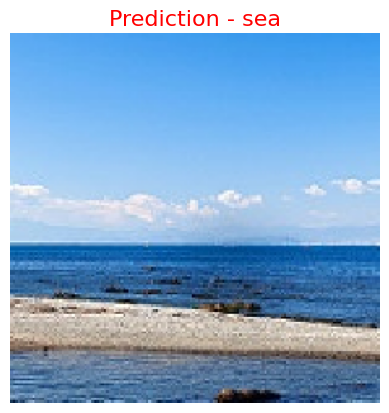

In [60]:
predict_img('/content/intel_data/seg_pred/seg_pred/1003.jpg', model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


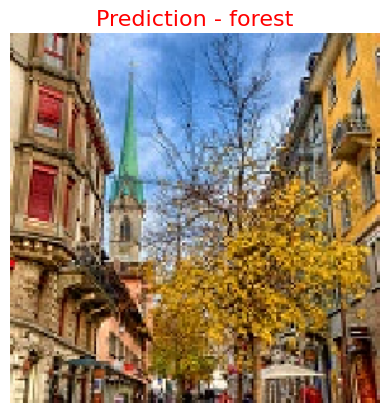

In [61]:
predict_img('/content/intel_data/seg_pred/seg_pred/10004.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


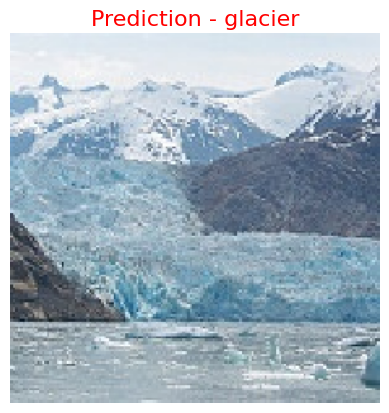

In [62]:
predict_img('/content/intel_data/seg_pred/seg_pred/101.jpg', model)

#Visualize some misclassified images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━

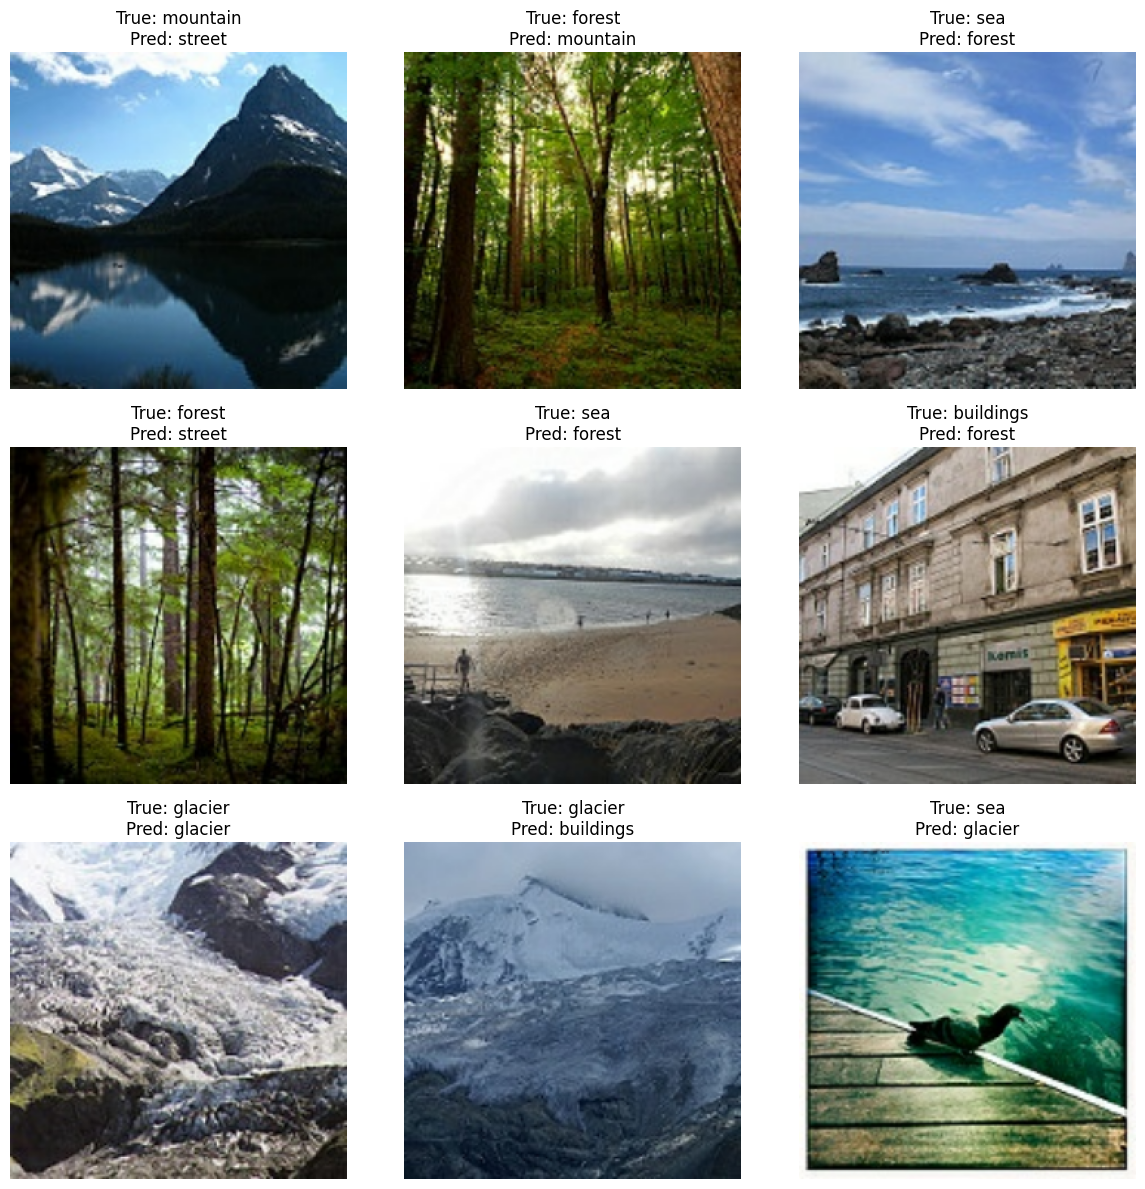

In [63]:
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

report = classification_report(y_true, y_pred, target_names=classes_names)
print(report)

misclassified_indices = np.where(y_true != y_pred)[0]

misclassified_images = []
misclassified_labels = []
misclassified_preds = []

for i, (images, labels) in enumerate(test_ds):
    if i * BATCH_SIZE >= len(y_true):
        break
    for j in range(len(images)):
        if len(misclassified_indices) == 0:
            break
        if (i * BATCH_SIZE + j) in misclassified_indices:
            misclassified_images.append(images[j].numpy())
            misclassified_labels.append(classes_names[labels[j]])
            misclassified_preds.append(classes_names[y_pred[i * BATCH_SIZE + j]])


plt.figure(figsize=(12, 12))
for i in range(min(9, len(misclassified_images))):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((misclassified_images[i] * 255).astype("uint8"))
    plt.title(f"True: {misclassified_labels[i]}\nPred: {misclassified_preds[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()